In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import fos_reader

In [2]:
def reader_fos(fileName):
    df = pandas.read_json(fileName, lines=True)
    fos_authors_and_year = df[["authors", "year"]]
    fos_authors_and_year_since_1990 = fos_authors_and_year.loc[fos_authors_and_year["year"] > 1989]
    return fos_authors_and_year_since_1990

In [3]:
fileName = "author_indexed_fos_indexed_dblp_part35.out"
df = reader_fos(fileName)


In [3]:
import re
dblp_part_regex = re.compile("author_indexed_fos*")
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)
part_files = list(part_files_filter_obj)
list_of_dataframes = list(map(reader_fos, part_files))
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [4]:
withoutOneAuthors = df.loc[df["authors"].apply(len) > 1]

In [5]:
authors = df["authors"]

In [6]:
authors.loc[0][0]["index"]

512620

In [6]:
graph = {}
import itertools
def add_authors_to_graph(authors_list, graph):
    for x, y in itertools.product(authors_list, authors_list):
        x_index = x["index"]
        y_index = y["index"]
        if x_index != y_index:
            if x_index < y_index:
                edge_name = str(x_index) + "_" + str(y_index)
            else:
                edge_name = str(y_index) + "_" + str(x_index)
            weight = graph.get(edge_name, 0)
            graph[edge_name] = weight + 1
            
authors.apply(lambda authors_group: add_authors_to_graph(authors_group, graph))

0          None
1          None
2          None
3          None
4          None
           ... 
3919441    None
3919442    None
3919443    None
3919444    None
3919445    None
Name: authors, Length: 3919446, dtype: object

In [8]:
graph

{'512620_516358': 2,
 '193842_193843': 4,
 '193842_516359': 2,
 '193842_193844': 4,
 '193842_516360': 2,
 '193843_516359': 8,
 '193843_193844': 4,
 '193843_516360': 2,
 '193844_516359': 2,
 '516359_516360': 2,
 '193844_516360': 2,
 '209885_367061': 24,
 '367061_378615': 4,
 '84635_367061': 4,
 '283544_367061': 4,
 '209885_378615': 8,
 '84635_209885': 14,
 '209885_283544': 14,
 '84635_378615': 8,
 '283544_378615': 6,
 '84635_283544': 30,
 '516361_516362': 2,
 '516361_516363': 2,
 '516361_516364': 2,
 '516362_516363': 10,
 '516362_516364': 2,
 '516363_516364': 2,
 '196814_276446': 2,
 '276446_516365': 2,
 '276446_299946': 12,
 '276446_516366': 2,
 '196814_516365': 46,
 '196814_299946': 2,
 '196814_516366': 2,
 '299946_516365': 4,
 '516365_516366': 2,
 '299946_516366': 2,
 '758_43243': 10,
 '758_516367': 20,
 '758_516368': 2,
 '758_43246': 12,
 '758_2465': 2,
 '758_516369': 2,
 '758_516370': 2,
 '43243_516367': 2,
 '43243_516368': 2,
 '43243_43246': 6,
 '2465_43243': 2,
 '43243_516369': 2

In [7]:
import networkx

In [8]:
ngraph = networkx.Graph()
for edge, weight in graph.items():
    nodes = edge.split("_")
    node_x = int(nodes[0])
    node_y = int(nodes[1])
    ngraph.add_edge(node_x, node_y, weight = weight)

In [9]:
ngraph.number_of_edges()

11524245

In [12]:
# networkx.write_graphml(ngraph, "graph_authors_connections.graphml")

In [13]:
ngraph

In [15]:
k4_clique = networkx.algorithms.community.k_clique_communities(ngraph, 4)

In [16]:
k4_cliques = []
for set in k4_clique:
    k4_cliques.append(set)

In [18]:
len(k4_cliques)

405861

In [15]:
sets = []
for set in generator:
    sets.append(set)

In [16]:
sets

[frozenset({3, 4, 284958, 314174, 314175, 352246, 835509}),
 frozenset({3, 4, 6, 811069, 1612273}),
 frozenset({4, 100448, 100449, 1612273, 3312238}),
 frozenset({4, 349987, 1640637, 3331052, 3331053, 3331054}),
 frozenset({4, 407014, 828229, 3347464, 3347465}),
 frozenset({77937, 285751, 1572867, 3349640}),
 frozenset({9, 205690, 3373721, 3373722}),
 frozenset({9, 15514, 35147, 42301, 1509631}),
 frozenset({6309,
            128611,
            171480,
            374580,
            374581,
            1048589,
            1155747,
            1156912,
            1322082,
            1649581,
            2011344}),
 frozenset({19, 2998, 93592, 3320677}),
 frozenset({19,
            274890,
            426835,
            463395,
            1165501,
            1505853,
            1862445,
            2755564,
            3082700,
            3303025,
            3303026,
            3303027,
            3303028,
            3303029,
            3303030}),
 frozenset({20, 314933, 3

In [14]:
k3_clique = networkx.algorithms.community.k_clique_communities(ngraph, 3)

In [15]:
k3_cliques = []
for set in k3_clique:
    k3_cliques.append(set)

In [21]:
import gc

In [22]:
gc.collect()

40

In [23]:
del k3_clique

In [24]:
import numpy as np

In [30]:
np_k4_cliques = np.array([np.array(clique) for clique in k4_cliques])

In [18]:
import pickle

In [16]:
dump_file = open("k3_cliques.pickle", "wb+")

In [19]:
pickle.dump(k3_cliques, dump_file)

In [20]:
len(k3_cliques)

407791

In [26]:
k3_cliques.sort(key=lambda x: len(x), reverse=True)

In [28]:
k3_cliques[:10]

[frozenset({0,
            3,
            4,
            5,
            6,
            9,
            10,
            11,
            12,
            13,
            15,
            16,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            34,
            35,
            36,
            37,
            38,
            41,
            43,
            44,
            45,
            46,
            47,
            48,
            49,
            50,
            51,
            52,
            56,
            57,
            65,
            67,
            68,
            69,
            70,
            71,
            72,
            74,
            77,
            79,
            80,
            81,
            82,
            83,
            84,
            85,
            86,
            87,
            88,
            90

In [10]:
k5_clique = networkx.algorithms.community.k_clique_communities(ngraph, 5)

In [ ]:
k5_cliques = []
for set in k5_clique:
    k5_cliques.append(set)

In [ ]:
import pickle

In [ ]:
dump_file = open("k2_cliques.pickle", "wb+")

In [ ]:
pickle.dump(k2_cliques, dump_file)

In [1]:
import pickle

In [2]:
k3_cliques_file = open("k3_cliques.pickle", "rb")

In [3]:
k3_cliques = pickle.load(k3_cliques_file)

In [4]:
k3_cliques.sort(key=lambda x: len(x), reverse=True)

In [5]:
ten_biggest_cliques = k3_cliques[:10]

In [10]:
import networkx as nx

In [11]:
graph = nx.Graph()

In [ ]:
import itertools
for clique in k3_cliques:
    for x, y in itertools.product(clique, clique):
        if x != y:
            graph.add_edge(x, y)

In [6]:
len(ten_biggest_cliques[0])

1397423

In [7]:
map(len, ten_biggest_cliques)

In [8]:
list(_)

[1397423, 477, 269, 269, 210, 203, 197, 183, 159, 155]

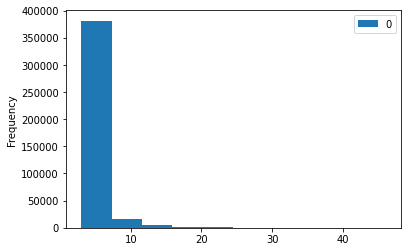

In [16]:
import pandas
pandas.DataFrame(list(map(len, k3_cliques))[300:]).plot.hist()